In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\vnet_feb20.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-25,19.400000,19.500000,17.32,17.750000,17.750000,2323400
1,2011-04-26,17.700001,18.709999,17.40,17.559999,17.559999,1800000
2,2011-04-27,17.840000,17.840000,15.80,16.250000,16.250000,1976500
3,2011-04-28,16.110001,16.780001,15.70,16.030001,16.030001,1900000
4,2011-04-29,15.950000,16.420000,15.30,15.510000,15.510000,1343900
...,...,...,...,...,...,...,...
2221,2020-02-21,14.830000,14.830000,14.07,14.670000,14.670000,699400
2222,2020-02-24,14.000000,14.720000,13.89,14.460000,14.460000,535700
2223,2020-02-25,14.820000,15.650000,14.71,15.220000,15.220000,1264700
2224,2020-02-26,15.220000,15.950000,14.90,14.950000,14.950000,817200


In [3]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
data_training.shape

(2145, 5)

In [6]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[5.51611715e-01, 5.40114613e-01, 4.89211328e-01, 4.88480939e-01,
        6.23378815e-02],
       [4.90039859e-01, 5.11819448e-01, 4.92187518e-01, 4.81641450e-01,
        4.80918669e-02],
       [4.95110449e-01, 4.80659026e-01, 4.32663707e-01, 4.34485257e-01,
        5.28958822e-02],
       ...,
       [1.44512852e-01, 1.42550143e-01, 1.45089291e-01, 1.47228227e-01,
        1.02531022e-02],
       [1.48134728e-01, 1.41475645e-01, 1.48809529e-01, 1.49748026e-01,
        1.15949603e-03],
       [1.49945666e-01, 1.44699140e-01, 1.52157744e-01, 1.48308141e-01,
        4.79040612e-04]])

In [7]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape

(2045, 100, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 110)          88440     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 110)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               1

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 125, batch_size = 32)

Epoch 1/125
64/64 [==============================] - 20s 314ms/step - loss: 0.0180
Epoch 2/125
64/64 [==============================] - 19s 290ms/step - loss: 0.0040
Epoch 3/125
64/64 [==============================] - 20s 307ms/step - loss: 0.0039
Epoch 4/125
64/64 [==============================] - 20s 310ms/step - loss: 0.0038
Epoch 5/125
64/64 [==============================] - 20s 310ms/step - loss: 0.0037
Epoch 6/125
64/64 [==============================] - 20s 317ms/step - loss: 0.0031
Epoch 7/125
64/64 [==============================] - 21s 324ms/step - loss: 0.0026
Epoch 8/125
64/64 [==============================] - 20s 317ms/step - loss: 0.0028
Epoch 9/125
64/64 [==============================] - 21s 321ms/step - loss: 0.0023
Epoch 10/125
64/64 [==============================] - 20s 318ms/step - loss: 0.0027
Epoch 11/125
64/64 [==============================] - 20s 311ms/step - loss: 0.0023
Epoch 12/125
64/64 [==============================] - 20s 309ms/step - loss: 0.0023
E

In [13]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2145,2019-10-31,8.28,8.52,8.18,8.48,8.48,114700
2146,2019-11-01,8.52,8.68,8.39,8.52,8.52,151400
2147,2019-11-04,8.61,8.61,8.38,8.47,8.47,164300
2148,2019-11-05,8.49,8.50,8.16,8.19,8.19,95200
2149,2019-11-06,8.19,8.19,8.05,8.08,8.08,78100


In [14]:
past_60_days = data_testing.tail(60)

In [15]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,6.84,7.07,6.80,6.81,331900
1,6.72,6.73,6.50,6.51,244000
2,6.84,7.08,6.78,7.01,330600
3,7.02,7.11,6.98,7.04,115000
4,7.04,7.13,6.98,6.98,584400


In [16]:
inputs = scaler.transform(df)
inputs

array([[0.09670409, 0.09491404, 0.09784227, 0.09467243, 0.0081328 ],
       [0.09235784, 0.08273639, 0.08668155, 0.08387329, 0.00574032],
       [0.09670409, 0.09527221, 0.09709822, 0.10187185, 0.00809742],
       [0.10322347, 0.0963467 , 0.10453869, 0.10295177, 0.00222917],
       [0.10394784, 0.09706304, 0.10453869, 0.10079194, 0.0150054 ],
       [0.10068815, 0.09455587, 0.10193453, 0.100072  , 0.00420521],
       [0.09996378, 0.09992837, 0.1015625 , 0.10799136, 0.03688341],
       [0.11046722, 0.10565903, 0.11272322, 0.11015119, 0.0032798 ],
       [0.10974284, 0.10494269, 0.1108631 , 0.1137509 , 0.00424332],
       [0.11517566, 0.10530086, 0.109375  , 0.10799136, 0.00259117],
       [0.11082941, 0.10422636, 0.10900298, 0.11195105, 0.00729176],
       [0.11408909, 0.10494269, 0.11309524, 0.1137509 , 0.00420794],
       [0.11372691, 0.10637536, 0.11421131, 0.11087113, 0.01230808],
       [0.11336472, 0.10458453, 0.10863096, 0.10727142, 0.00601795],
       [0.10865628, 0.0984957 , 0.

In [17]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 60, 5), (81,))

In [18]:
x_test.shape

(81, 60, 5)

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
scaler.scale_

array([3.62187600e-02, 3.58166189e-02, 3.72023823e-02, 3.59971215e-02,
       2.72182166e-08])

In [21]:
scale = 1 / 3.62187600e-02
scale

27.610001005004033

In [22]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [23]:
y_pred.shape

(81, 1)

In [24]:
y_pred[0:]

array([[9.967243 ],
       [8.489276 ],
       [6.922304 ],
       [5.910838 ],
       [5.3563194],
       [4.987611 ],
       [4.756264 ],
       [4.647249 ],
       [4.604917 ],
       [4.5640206],
       [4.443868 ],
       [4.304734 ],
       [4.2435994],
       [4.2982197],
       [4.1633196],
       [3.9677544],
       [3.7776031],
       [3.6680443],
       [3.6123626],
       [3.5068126],
       [3.3770058],
       [3.241429 ],
       [3.1395957],
       [3.0332112],
       [3.0102327],
       [3.061932 ],
       [3.122267 ],
       [3.161176 ],
       [3.1985006],
       [3.2826242],
       [3.3693428],
       [3.405203 ],
       [3.4100487],
       [3.415363 ],
       [3.4116347],
       [3.379453 ],
       [3.311489 ],
       [3.216187 ],
       [3.097655 ],
       [2.977463 ],
       [2.859509 ],
       [2.8308342],
       [2.9396086],
       [3.2383237],
       [3.6480381],
       [4.2341413],
       [4.752312 ],
       [5.0061917],
       [5.00575  ],
       [4.8483887],


In [25]:
y_test.shape

(81,)

In [26]:
y_test[0:]

array([ 4.11,  4.35,  4.44,  4.32,  4.02,  3.99,  4.07,  4.06,  4.03,
        3.97,  3.73,  3.79,  3.91,  3.55,  3.42,  3.28,  3.39,  3.4 ,
        3.23,  2.87,  2.81,  2.67,  2.55,  2.67,  2.85,  2.87,  2.78,
        2.76,  3.05,  3.03,  3.18,  3.06,  3.15,  3.14,  3.13,  3.  ,
        2.8 ,  2.51,  2.47,  2.29,  2.93,  2.53,  3.32,  3.54,  4.27,
        5.03,  5.13,  5.12,  4.96,  4.79,  5.38,  5.43,  6.17,  6.83,
        6.32,  6.26,  6.16,  6.26,  5.84,  5.65,  5.61,  5.35,  5.19,
        5.12,  5.83,  6.43,  6.71,  8.58,  7.83,  8.83,  9.01,  9.33,
        9.37,  9.27,  9.71, 10.4 , 10.66,  9.83, 10.65, 11.05, 10.6 ])

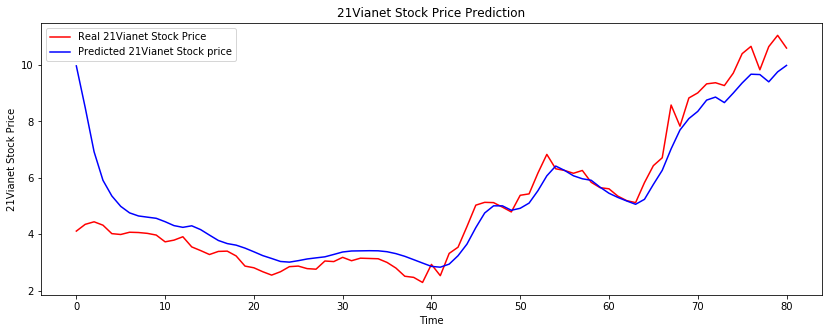

In [27]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real 21Vianet Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted 21Vianet Stock price')
plt.title('21Vianet Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('21Vianet Stock Price')
plt.legend()
plt.show()